In [1]:
# if open from google colab, run this command
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Github/sales-prediction-gru/ipynb
%cd /content/drive/Shareddrives/BUAT\ DIEGO/Data-retail-2015-2022-keluar/

Mounted at /content/drive
/content/drive/Shareddrives/BUAT DIEGO/Data-retail-2015-2022-keluar


In [87]:
import os, warnings, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model, callbacks

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed = 0
seed_everything(seed)
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# df2015 = pd.read_csv('./data-2015-renew.csv')
df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
# df2020 = pd.read_csv('./data-2020-renew.csv')
# df2021 = pd.read_csv('./data-2021-renew.csv')
# df2022 = pd.read_csv('./data-2022-renew.csv')

In [4]:
df2016 = df2016.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2017 = df2017.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [5]:
df = pd.concat([df2016, df2017, df2018])

In [6]:
df['month_yr'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [7]:
df['month_yr'] = df['month_yr'].map({'01-16':0,'02-16':1,'03-16':2,'04-16':3,'05-16':4,'06-16':5,'07-16':6,'08-16':7,'09-16':8,'10-16':9,'11-16':10,'12-16':11,
                                          '01-17':12,'02-17':13,'03-17':14,'04-17':15,'05-17':16,'06-17':17,'07-17':18,'08-17':19,'09-17':20,'10-17':21,'11-17':22,'12-17':23,
                                          '01-18':24,'02-18':25,'03-18':26,'04-18':27,'05-18':28,'06-18':29,'07-18':30,'08-18':31,'09-18':32,'10-18':33,'11-18':34,'12-18':35})

In [8]:
print(f"Min date from data set: {df['tgl'].min().date()}")
print(f"Max date from data set: {df['tgl'].max().date()}")

Min date from data set: 2016-01-01
Max date from data set: 2018-12-31


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8923868 entries, 0 to 3044193
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   satuan        object        
 2   qty           float64       
 3   barcode       object        
 4   kodejenis     object        
 5   kodekategori  float64       
 6   month_yr      int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 544.7+ MB


In [10]:
df.head()

,tgl,satuan,qty,barcode,kodejenis,kodekategori,month_yr
0,2016-10-28 12:09:33.220,PCS,4.00,8991038110354,10507,105.00,9
1,2016-01-02 15:51:33.187,PCS,1.00,4902430400664,10304,103.00,0
2,2016-07-22 18:48:08.593,PCS,1.00,8992772198011,10506,105.00,6
3,2016-06-24 11:46:13.417,PCS,1.00,8992933621112,20102,201.00,5
4,2016-11-06 13:57:40.160,PCS,2.00,3014260842956,10307,103.00,10


In [11]:
train_monthly = df[['tgl', 'month_yr', 'kodejenis', 'barcode', 'qty']]
train_monthly = train_monthly.sort_values('tgl').groupby(['month_yr', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_yr', 'kodejenis', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_yr').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

display(train_monthly.head())
# display(train_monthly.describe())

,month_yr,kodejenis,barcode,qty_cnt,qty_cnt_month
0,0,10101,4902430600835,1.00,4.00
1,0,10101,4902430600859,2.00,2.00
2,0,10101,4902430601023,2.00,1.00
3,0,10101,4902430601191,4.00,6.00
4,0,10101,4902430601207,8.00,4.00


In [12]:
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_yr',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_yr,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0000003624241,JB000034,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,00100809,20604,16.78,19.53,26.94,20.63,17.41,16.61,12.52,13.85,42.35,12.77,6.13,9.22,8.04,10.89,15.34,14.70,15.63,20.85,11.92,16.73,14.30,14.26,11.93,11.39,14.40,12.55,20.04,15.83,14.22,19.72,20.78,19.90,12.00,11.78,14.68,14.05
2,00113731,20607,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.00,0.75,0.95,1.03,1.51,0.00,0.00,0.00,0.00,0.00,0.00,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00113731,JB000067,12.03,4.82,6.13,4.16,4.84,4.40,6.23,6.69,4.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,00125789,20602,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.97,0.00,24.96,0.00,0.00,0.00,0.00,6.52,0.00,30.61,1.15,0.00,0.00,1.27,24.00,0.00,0.00,0.00,0.84,0.67,23.76,7.98,21.34,0.00,18.12,0.00,1.40


In [13]:
first_month = 23
last_month = 35
serie_size = 12
data_series = []

for index, row in monthly_series.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        serie = [row['barcode'], row['kodejenis']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)

columns = ['barcode', 'kodejenis']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()

,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,label
0,0000003624241,JB000034,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,00100809,20604,11.39,14.40,12.55,20.04,15.83,14.22,19.72,20.78,19.90,12.00,11.78,14.68,14.05
2,00113731,20607,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00113731,JB000067,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,00125789,20602,24.00,0.00,0.00,0.00,0.84,0.67,23.76,7.98,21.34,0.00,18.12,0.00,1.40


In [14]:
data_series = data_series.drop(['barcode', 'kodejenis'], axis=1)

In [15]:
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)

In [16]:
print("Train set", train.shape)
print("Validation set", valid.shape)
train.head()

Train set (31882, 12)
Validation set (3543, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
22950,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
21633,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26017,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,6.00,2.00,0.00,0.00
2931,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4890,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [17]:
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set reshaped (31882, 12, 1)
Validation set reshaped (3543, 12, 1)


In [18]:
serie_size =  X_train.shape[1] # 12
n_features =  X_train.shape[2] # 1

epochs = 1000
batch = 128
lr = 0.0001

gru_model = Sequential()
gru_model.add(L.GRU(10, input_shape=(serie_size, n_features), return_sequences=True))
gru_model.add(L.GRU(6, activation='relu', return_sequences=True))
gru_model.add(L.GRU(1, activation='relu'))
gru_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
gru_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
gru_model.add(L.Dense(1))
gru_model.summary()

adam = optimizers.Adam(lr)
gru_model.compile(loss='mse', optimizer=adam)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 12, 10)            390       
                                                                 
 gru_1 (GRU)                 (None, 12, 6)             324       
                                                                 
 gru_2 (GRU)                 (None, 1)                 27        
                                                                 
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 882
Trainable params: 882
Non-trainable pa

In [19]:
early_stop = callbacks.EarlyStopping(patience = 10)
gru_history = gru_model.fit(X_train, Y_train, 
                              validation_data=(X_valid, Y_valid), 
                              batch_size=batch, 
                              epochs=epochs, 
                              verbose=2,
                              callbacks=[early_stop])

Epoch 1/1000
250/250 - 9s - loss: 78.4552 - val_loss: 86.5238 - 9s/epoch - 38ms/step
Epoch 2/1000
250/250 - 4s - loss: 74.9814 - val_loss: 79.6997 - 4s/epoch - 15ms/step
Epoch 3/1000
250/250 - 4s - loss: 63.7005 - val_loss: 60.2595 - 4s/epoch - 15ms/step
Epoch 4/1000
250/250 - 4s - loss: 46.4637 - val_loss: 42.2730 - 4s/epoch - 15ms/step
Epoch 5/1000
250/250 - 4s - loss: 36.1446 - val_loss: 34.1200 - 4s/epoch - 17ms/step
Epoch 6/1000
250/250 - 4s - loss: 32.2336 - val_loss: 31.9254 - 4s/epoch - 15ms/step
Epoch 7/1000
250/250 - 4s - loss: 31.1769 - val_loss: 31.0833 - 4s/epoch - 16ms/step
Epoch 8/1000
250/250 - 4s - loss: 30.5184 - val_loss: 30.5093 - 4s/epoch - 16ms/step
Epoch 9/1000
250/250 - 4s - loss: 29.9546 - val_loss: 29.8412 - 4s/epoch - 17ms/step
Epoch 10/1000
250/250 - 4s - loss: 29.4559 - val_loss: 29.3254 - 4s/epoch - 15ms/step
Epoch 11/1000
250/250 - 4s - loss: 28.9591 - val_loss: 28.8515 - 4s/epoch - 15ms/step
Epoch 12/1000
250/250 - 4s - loss: 28.5988 - val_loss: 28.5074 

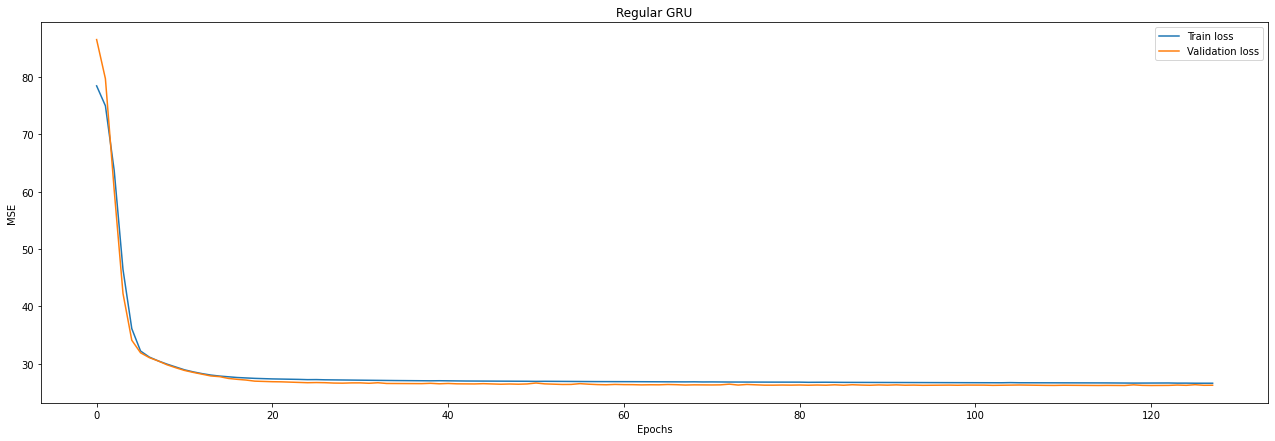

In [20]:
fig, ax1 = plt.subplots(1, sharey=True,figsize=(22,7))

ax1.plot(gru_history.history['loss'], label='Train loss')
ax1.plot(gru_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Regular GRU')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

plt.show()

In [21]:
lstm_train_pred = gru_model.predict(X_train)
lstm_val_pred = gru_model.predict(X_valid)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))

Train rmse: 5.157308011513891
Validation rmse: 5.126003852377024


# Test - web

In [101]:
# testing
testing = df2019.copy()

testing['month_yr'] = testing['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing['month_yr'] = testing['month_yr'].map({'01-19':0,'02-19':1,'03-19':2,'04-19':3,'05-19':4,'06-19':5,'07-19':6,'08-19':7,'09-19':8,'10-19':9,'11-19':10,'12-19':11})

test_monthly = testing[['tgl', 'month_yr', 'kodejenis', 'barcode', 'qty']]
test_monthly = test_monthly.sort_values('tgl').groupby(['month_yr', 'kodejenis', 'barcode'], as_index=False)
test_monthly = test_monthly.agg({'qty':['sum']})
test_monthly.columns = ['month_yr', 'kodejenis', 'barcode', 'qty_cnt']
test_monthly = test_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
test_monthly['qty_cnt_month'] = test_monthly.sort_values('month_yr').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

test_monthly_series = test_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_yr',values='qty_cnt', fill_value=0).reset_index()

In [102]:
test_monthly_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18081 entries, 0 to 18080
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   barcode    18081 non-null  object 
 1   kodejenis  18081 non-null  object 
 2   0          18081 non-null  float64
 3   1          18081 non-null  float64
 4   2          18081 non-null  float64
 5   3          18081 non-null  float64
 6   4          18081 non-null  float64
 7   5          18081 non-null  float64
 8   6          18081 non-null  float64
 9   7          18081 non-null  float64
 10  8          18081 non-null  float64
 11  9          18081 non-null  float64
 12  10         18081 non-null  float64
 13  11         18081 non-null  float64
dtypes: float64(12), object(2)
memory usage: 1.9+ MB


In [103]:
X = test_monthly_series.drop_duplicates(subset=['barcode', 'kodejenis'])
# X_test = pd.merge(clean_test, latest_records, on=['barcode'], how='left', suffixes=['', '_'])
X.fillna(0, inplace=True)
X.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [104]:
X.head()

month_yr,0,1,2,3,4,5,6,7,8,9,10,11
0,18.69,15.35,20.38,13.80,7.03,8.72,11.13,11.36,16.29,7.11,10.22,11.02
1,0.00,0.00,2.60,3.46,4.43,4.75,6.09,4.07,5.42,4.27,4.89,3.76
2,0.72,0.00,0.00,0.00,0.00,9.06,0.00,0.00,0.00,0.00,0.00,0.00
3,7.61,15.97,10.74,6.98,10.05,0.00,0.00,0.00,0.00,0.00,17.51,0.00
4,2.34,2.78,2.00,5.75,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.24


In [105]:
X_reshaped = X.values.reshape((X.shape[0], X.shape[1], 1))
print(X_reshaped.shape)

(18081, 12, 1)


In [106]:
model_pred = gru_model.predict(X_reshaped)

In [107]:
barcode_pred = test_monthly_series[['barcode']]

In [108]:
prediction = pd.DataFrame(barcode_pred['barcode'], columns=['barcode'])
prediction['item_qty_month'] = pd.DataFrame(model_pred)
prediction.tail()
# pred.to_csv('gru_submission.csv', index=False)

,barcode,item_qty_month
18076,99959,9.14
18077,99960,11.38
18078,9999,2.33
18079,9999979010344,0.23
18080,PK 008,10.00


# Test

In [22]:
test = df2019.drop(['tgl', 'satuan', 'qty', 'kodejenis', 'kodekategori'], axis=1)

In [23]:
test.head()

,barcode
0,8992752011408
1,8992696404441
2,089686043686
3,8992775204009
4,089686043204


In [24]:
clean_test = test.drop_duplicates(subset=['barcode'])

In [25]:
latest_records = monthly_series.drop_duplicates(subset=['barcode'])
X_test = pd.merge(clean_test, latest_records, on=['barcode'], how='left', suffixes=['', '_'])
X_test.fillna(0, inplace=True)
X_test.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [26]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.00,0.00,0.00,33.00,26.00,33.00,33.00,36.00,26.00,30.00,0.00,26.00,18.00,49.00,0.00,34.00,33.00,31.00,15.00,41.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [27]:
X_test = X_test[[(i + (36 - serie_size)) for i in range(serie_size)]]
X_test.head()

,24,25,26,27,28,29,30,31,32,33,34,35
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,26.00,30.00,0.00,26.00,18.00,49.00,0.00,34.00,33.00,31.00,15.00,41.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [28]:
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test_reshaped.shape)

(18769, 12, 1)


In [29]:
lstm_test_pred = gru_model.predict(X_test_reshaped)

In [30]:
lstm_prediction = pd.DataFrame(clean_test['barcode'], columns=['barcode'])
lstm_prediction['item_cnt_month'] = lstm_test_pred.clip(0., 50.)
lstm_prediction.head()
# lstm_prediction.to_csv('gru_submission.csv', index=False)

,barcode,item_cnt_month
0,8992752011408,0.15
1,8992696404441,0.15
2,089686043686,0.15
3,8992775204009,26.71
4,089686043204,0.15


In [31]:
lstm_prediction.head(100)

,barcode,item_cnt_month
0,8992752011408,0.15
1,8992696404441,0.15
2,089686043686,0.15
3,8992775204009,26.71
4,089686043204,0.15
5,8992770094117,0.15
6,8993560024901,26.87
7,8999999059781,0.15
8,8992802618731,13.73
9,8993189270765,19.98


In [32]:
# lstm_train_pred = gru_model.predict(X_train)
# lstm_val_pred = gru_model.predict(X_valid)
# print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
# print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))

# lstm_test_pred = gru_model.predict(X_valid)
# print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_test_pred)))